# <font color='black'>AirBnb in Singapore Analysis </font>
## <font color='blue'>by Sukri Alfian</font>

# <font color='black'>Business Understanding </font>
## <font color='black'>Background </font>
<font color='black'>Airbnb is a popular online marketplace and hospitality service that allows individuals to rent out their properties or spare rooms to guests. In this context, as a data analyst, I am tasked with analyzing Airbnb property data in Singapore to generate appropriate strategies. The analysis results are expected to provide the best possible benefits from rental activities </font>

## Objective

The objective of analyzing Airbnb Singapore data is to gain insights and make data-driven decisions that can contribute to the development of effective strategies. By analyzing various aspects of the data, such as pricing patterns, demand trends, property characteristics, and guest preferences, the aim is to identify opportunities to optimize rental activities and maximize returns. This may involve identifying profitable pricing strategies, understanding factors that influence booking trends, identifying popular neighborhoods or property types, and improving the overall guest experience. The ultimate goal is to leverage data analysis to inform decision-making and drive positive outcomes in the Airbnb rental business in Singapore.

### <font color='orange'> A. Library Used</font>

* `pandas` is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
* `numpy` is a python library that provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. It is widely used in scientific computing, data analysis, and machine learning applications.
* `pandasql` allows you to query pandas DataFrames using SQL syntax. It works similarly to sqldf in R .
* `plotly` is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical visualization


In [ ]:
!pip install pandas
!pip install pandasql
!pip install plotly
!pip install numpy
!pip install --upgrade 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=d0948bd1da123ff84c4d426eb47539196bfdc4b9d3c01342f8c52869cdc51a38
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninst

In [ ]:
# Library data manipulation
import pandas as pd
from pandasql import sqldf
import numpy as np
from datetime import datetime as dt
import numpy as np
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Library Data Visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

### <font color='orange'> B. Dataset</font>

## Import Dataset

In [ ]:
path1 = "/content/drive/MyDrive/Dataset Capstone Project - DQLab Analyst Bootcamp/DQLab_listings(22Sep2022) (1).csv"
path2 = "/content/drive/MyDrive/Dataset Capstone Project - DQLab Analyst Bootcamp/DQLab_nieghbourhood(22Sep2022).csv"
path3 = "/content/drive/MyDrive/Dataset Capstone Project - DQLab Analyst Bootcamp/DQLab_reviews(22Sep2022).csv"

In [ ]:
df_listings = pd.read_csv (path1)
df_neighbourhood = pd.read_csv (path2)
df_reviews = pd.read_csv (path3)

`df_listings` : This table contains a list of listings in Singapore


In [ ]:
df_listings.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,0,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Bukit Timah,1.33432,103.78521,Private room,80,92,365
1,1,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,Tampines,1.34537,103.95887,Private room,145,92,340
2,2,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,Tampines,1.34754,103.95958,Private room,85,92,265
3,3,71903,Room 2-near Airport & EXPO,367042,Belinda,Tampines,1.34531,103.96100,Private room,85,92,365
4,4,275344,15 mins to Outram MRT Single Room,1439258,Kay,Bukit Merah,1.28836,103.81144,Private room,49,60,296


- `id` : Listing’s unique Airbnb id <br>
- `name` : Listing’s name/ display in the Airbnb web<br>
- `host_id` : Listing host’s unique id <br>
- `host_name` : Listing host’s name <br>
- `neighborhood` : Listings’s neighborhood name <br>
- `latitude` : Listing’s earth latitude location <br>
- `longitude` : Listing’s earth longitude location <br>
- `room_type` : Listing’s room type <br>
- `price Listing’s` : Price <br>
- `minimum_nights` : Indicator of minimum stay length <br>
- `avaiability_365` : Indicator of the total number of days the listing is
available for during the year

`df_neighbourhood` : This table contains the mapping of the Singapore region based on its neighborhood


In [ ]:
df_neighbourhood.head(5)

,Unnamed: 0,neighbourhood_group,neighbourhood
0,0,Central Region,Bishan
1,1,Central Region,Bukit Merah
2,2,Central Region,Bukit Timah
3,3,Central Region,Downtown Core
4,4,Central Region,Geylang


`neighbourhood_group` : Singapore region (North/East/South/West/North-East) <br>
`neighbourhood` : Singapore neighborhoods name


`df_reviews` : This table contains the mapping of the Singapore region based on its neighborhood


In [ ]:
df_reviews.head(5)

,Unnamed: 0,listing_id,date
0,28,71609,2018-07-14
1,29,71609,2019-01-06
2,30,71609,2019-07-27
3,31,71609,2019-08-11
4,32,71609,2019-09-07


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important step in any data analysis project. The goal of EDA is to thoroughly understand the data and identify any issues or anomalies that can impact further analysis. This includes identifying missing values, outliers, and inconsistencies in the data, as well as exploring variables and relationships between variables.

### <font color='orange'> A. Data Collection </font>

In [ ]:
""" Create dataframe stored as dataset,
    this dataset is merged from all datasets and variabels we have
"""
# Using SQL

query = """
SELECT df1.id AS id,
       df1.name AS name,
       df1.host_id AS host_id,
       df1.host_name AS host_name,
       df1.neighbourhood AS neighbourhood,
       df1.latitude AS latitude,
       df1.longitude AS longitude,
       df1.room_type AS room_type,
       df1.price AS price,
       df1.minimum_nights AS minimum_nights,
       df1.availability_365 AS availability,
       df2.neighbourhood_group AS region,
       df3.date AS date
FROM df_listings AS df1
JOIN df_neighbourhood AS df2 ON df1.neighbourhood = df2.neighbourhood
JOIN df_reviews AS df3 ON df1.id = df3.listing_id
ORDER BY df3.date ASC
"""
dataset = sqldf(query, locals())

dataset.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability,region,date
0,606784,"Ensuite room, pool, near airport, expo and sutd.",813925,Happy,Tampines,1.34361,103.95717,Private room,83,92,91,East Region,2018-01-01
1,756267,East Coast Boutique,1584407,Richard,Marine Parade,1.30416,103.90076,Private room,250,92,0,Central Region,2018-01-01
2,982909,Amazing Sunset Home @Central Area,4723385,Yuan,Novena,1.33389,103.83454,Private room,90,92,145,Central Region,2018-01-01
3,2387715,"City Private room 2-pax near MRT, shared toilet",12067440,Peggy,Kallang,1.31170,103.86028,Private room,98,1,355,Central Region,2018-01-01
4,4008423,"City 1-Pax Private Room, Shared Toilet",12067440,Peggy,Kallang,1.31179,103.86002,Private room,62,1,348,Central Region,2018-01-01
5,4664392,CS S3 Central studio with private bath & kitchen!,7095710,Elise,Outram,1.28135,103.84868,Entire home/apt,115,92,145,Central Region,2018-01-01
6,5827998,The Lily Room,30080617,Eddie,Tampines,1.34460,103.96223,Private room,60,92,59,East Region,2018-01-01
7,5889741,Entire Home in the Heart of City,5365111,Y,Rochor,1.30153,103.85344,Entire home/apt,173,92,121,Central Region,2018-01-01
8,6716844,4-person Bunk/Loft Bed Private Room,8773916,Superb Hostel,Rochor,1.30205,103.85804,Private room,120,92,0,Central Region,2018-01-01
9,8119347,Excellent accommodation & location,31125377,Siong Yew,Woodlands,1.46088,103.76716,Entire home/apt,50,2,205,North Region,2018-01-01


In [ ]:
#Convert float into integer
dataset[['id','price', 'host_id', 'minimum_nights', 'availability']] = dataset[['id','price', 'host_id', 'minimum_nights', 'availability']].astype(int)

#Convert date into datetime
dataset['date'] = pd.to_datetime(dataset['date'])

### <font color='orange'> B. Data Cleansing </font>

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49695 entries, 0 to 49694
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              49695 non-null  int64         
 1   name            49695 non-null  object        
 2   host_id         49695 non-null  int64         
 3   host_name       49695 non-null  object        
 4   neighbourhood   49695 non-null  object        
 5   latitude        49695 non-null  float64       
 6   longitude       49695 non-null  float64       
 7   room_type       49695 non-null  object        
 8   price           49695 non-null  int64         
 9   minimum_nights  49695 non-null  int64         
 10  availability    49695 non-null  int64         
 11  region          49695 non-null  object        
 12  date            49695 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 4.9+ MB


#### Checking Duplicated Value of Dataset



In [ ]:
dataset.nunique()

id                2486
name              2388
host_id            704
host_name          588
neighbourhood       42
latitude          2023
longitude         2072
room_type            4
price              452
minimum_nights      34
availability       321
region               5
date              1726
dtype: int64

In [ ]:
duplicated_count = dataset.duplicated().sum()
print(f'Number of Duplicated : {duplicated_count}')

Number of Duplicated : 683


In [ ]:
dataset = dataset.drop_duplicates().reset_index(drop=True)

#### Identifying Missing Value

In [ ]:
mv = dataset.isna().sum()
print("\nCount missing value per kolom:\n", mv)


Count missing value per kolom:
 id                0
name              0
host_id           0
host_name         0
neighbourhood     0
latitude          0
longitude         0
room_type         0
price             0
minimum_nights    0
availability      0
region            0
date              0
dtype: int64


#### Checking Correlation Matrix

<ipython-input-15-8a2c51683618>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


<Axes: >

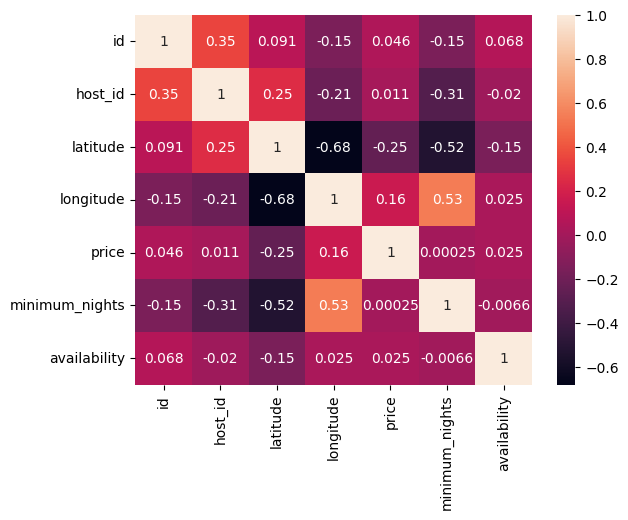

In [ ]:
correlation_matrix = dataset.corr()

# Create correlation heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True)


#### Dealing With Outliers

In [ ]:
# Create the box plot trace
outliers = go.Box(x=dataset['price'], marker=dict(color='blue'), width = 1000)

# Create the layout
layout = go.Layout(
    xaxis=dict(showgrid=False, tickfont=dict(color='red')),
    yaxis=dict(showgrid=False, tickfont=dict(color='white')),
)

# Create the figure
outliers = go.Figure(data=outliers, layout = layout,)

# Display the plot
outliers.show()

In [ ]:
Q1 = dataset['price'].quantile(0.25)
Q3 = dataset['price'].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask to identify outliers
outlier_mask = (dataset['price'] < (Q1 - 1.5 * IQR)) | (dataset['price'] > (Q3 + 1.5 * IQR))

# Filter the DataFrame to remove outliers
dataset = dataset[~outlier_mask]

# Reset the index
dataset = dataset.reset_index(drop=True)

#### Coordinate Validation

In [ ]:
# plotting map using plotly
coordinate_plot = px.scatter_mapbox(dataset, lat = 'latitude', lon = 'longitude', color = 'region', zoom = 10, mapbox_style='stamen-terrain', width = 800, height=600)

# setting title for the map
coordinate_plot.update_layout(title = 'Countries', title_x = 0.5)

coordinate_plot.show()

From the coordinate plot, I observed that there are a few listings located in Malaysia or outside Singapore. So I need to filter the coordinate in order to analyze the listings in Singapore only. The frontier between Singapore and Malaysia is marked with a dotted line.

In [ ]:
#define the boundary points
lat_min, lat_max = 1.27316, 1.449275
lon_min, lon_max = 103.6934, 103.9671

# Filter the dataset based on the boundary points
filtered_data = dataset[(dataset['latitude'] >= lat_min) & (dataset['latitude'] <= lat_max) &
                        (dataset['longitude'] >= lon_min) & (dataset['longitude'] <= lon_max)]

#drop rows outside boundary point
dataset_new = filtered_data

# Create the scatter mapbox plot
clean_coor = px.scatter_mapbox(dataset_new, lat='latitude', lon='longitude', color='region',
                        size_max=5, opacity=0.7, zoom=10)

# Set the mapbox style
clean_coor.update_layout(title='Countries', mapbox_style='stamen-terrain', title_x =0.5)

# Set the plot size
clean_coor.update_layout(width=1000, height=600)

# Display the plot
clean_coor.show()

In [ ]:
dataset_new.shape

(16984, 13)

# Bussiness Analysis

## General Insight

### AirBnb Listings Prices Distribution in Singapore

In [ ]:
# Create the box plot trace
price_db = go.Box(x=dataset_new['price'], marker=dict(color='blue'), width = 1000)

# Create the layout
layout_db = go.Layout(xaxis=dict(showgrid=False))

#Create the figure
price_db = go.Figure(data=price_db, layout = layout_db)

#display
price_db.show()


In [ ]:
dataset_new['price'].mean()

98.03679934055582

The distribution of Airbnb listing prices in Singapore ranges from an average of 58 to 138 USD. The minimum price is 22 USD, while the maximum price is 217 USD.

In [ ]:
dataset_w = dataset_new
dataset_w['year'] = dataset_new['date'].dt.year
dataset_w.head(10)

<ipython-input-23-0c4e8b50efa6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability,region,date,year
0,606784,"Ensuite room, pool, near airport, expo and sutd.",813925,Happy,Tampines,1.34361,103.95717,Private room,83,92,91,East Region,2018-01-01,2018
1,982909,Amazing Sunset Home @Central Area,4723385,Yuan,Novena,1.33389,103.83454,Private room,90,92,145,Central Region,2018-01-01,2018
2,2387715,"City Private room 2-pax near MRT, shared toilet",12067440,Peggy,Kallang,1.31170,103.86028,Private room,98,1,355,Central Region,2018-01-01,2018
3,4008423,"City 1-Pax Private Room, Shared Toilet",12067440,Peggy,Kallang,1.31179,103.86002,Private room,62,1,348,Central Region,2018-01-01,2018
4,4664392,CS S3 Central studio with private bath & kitchen!,7095710,Elise,Outram,1.28135,103.84868,Entire home/apt,115,92,145,Central Region,2018-01-01,2018
5,5827998,The Lily Room,30080617,Eddie,Tampines,1.34460,103.96223,Private room,60,92,59,East Region,2018-01-01,2018
6,5889741,Entire Home in the Heart of City,5365111,Y,Rochor,1.30153,103.85344,Entire home/apt,173,92,121,Central Region,2018-01-01,2018
7,6716844,4-person Bunk/Loft Bed Private Room,8773916,Superb Hostel,Rochor,1.30205,103.85804,Private room,120,92,0,Central Region,2018-01-01,2018
9,8180346,The Zen Room,30080617,Eddie,Tampines,1.34550,103.96045,Private room,45,92,181,East Region,2018-01-01,2018
11,8800763,Quaint & Chic Soho (Long Stay),46116154,Joyce,Marine Parade,1.30720,103.90167,Private room,89,92,0,Central Region,2018-01-01,2018


In [ ]:
dataset_w = dataset_new
dataset_w['year_month'] = dataset_new['date'].dt.strftime('%y-%m')
dataset_w.head(10)

<ipython-input-24-811d2b51c3e0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability,region,date,year,year_month
0,606784,"Ensuite room, pool, near airport, expo and sutd.",813925,Happy,Tampines,1.34361,103.95717,Private room,83,92,91,East Region,2018-01-01,2018,18-01
1,982909,Amazing Sunset Home @Central Area,4723385,Yuan,Novena,1.33389,103.83454,Private room,90,92,145,Central Region,2018-01-01,2018,18-01
2,2387715,"City Private room 2-pax near MRT, shared toilet",12067440,Peggy,Kallang,1.31170,103.86028,Private room,98,1,355,Central Region,2018-01-01,2018,18-01
3,4008423,"City 1-Pax Private Room, Shared Toilet",12067440,Peggy,Kallang,1.31179,103.86002,Private room,62,1,348,Central Region,2018-01-01,2018,18-01
4,4664392,CS S3 Central studio with private bath & kitchen!,7095710,Elise,Outram,1.28135,103.84868,Entire home/apt,115,92,145,Central Region,2018-01-01,2018,18-01
5,5827998,The Lily Room,30080617,Eddie,Tampines,1.34460,103.96223,Private room,60,92,59,East Region,2018-01-01,2018,18-01
6,5889741,Entire Home in the Heart of City,5365111,Y,Rochor,1.30153,103.85344,Entire home/apt,173,92,121,Central Region,2018-01-01,2018,18-01
7,6716844,4-person Bunk/Loft Bed Private Room,8773916,Superb Hostel,Rochor,1.30205,103.85804,Private room,120,92,0,Central Region,2018-01-01,2018,18-01
9,8180346,The Zen Room,30080617,Eddie,Tampines,1.34550,103.96045,Private room,45,92,181,East Region,2018-01-01,2018,18-01
11,8800763,Quaint & Chic Soho (Long Stay),46116154,Joyce,Marine Parade,1.30720,103.90167,Private room,89,92,0,Central Region,2018-01-01,2018,18-01


### AirBnb Rental Trend per Year in Singapore

In [ ]:
order_by_year = """
SELECT COUNT(date) AS amount_orders, year
FROM dataset_w
GROUP BY year
"""

order_by_year = sqldf (order_by_year, locals())

order_by_year.head()

,amount_orders,year
0,4934,2018
1,6453,2019
2,2712,2020
3,1665,2021
4,1220,2022


In [ ]:
# Create the curve chart
fig_ovr_prc = px.line(order_by_year, x='year', y='amount_orders', markers=True,template="simple_white")

# Modify title
fig_ovr_prc.update_layout(title="<b>AirBnb Rental Trend per Year</b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
fig_ovr_prc.update_xaxes(title="<b>Month</b>", title_font=dict(size=14, family="arial", color="black"), dtick=1)
fig_ovr_prc.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(size=14, family="arial", color="black"))

#Update Line
fig_ovr_prc.update_traces(line=dict(color='blue',width=3,dash="solid"),marker=dict(color="black",size=10,symbol="circle"))

# Display the chart
fig_ovr_prc.show()


In [ ]:
order_by_month = """
SELECT COUNT(date) AS amount_orders, year_month
FROM dataset_w
GROUP BY year_month
"""

order_by_month = sqldf (order_by_month, locals())

order_by_month.head()

,amount_orders,year_month
0,366,18-01
1,329,18-02
2,373,18-03
3,396,18-04
4,390,18-05


In [ ]:
fig_by_month = px.line(order_by_month, x="year_month", y="amount_orders",markers=True,template="simple_white")

#Modify title

fig_by_month.update_layout(title="<b>Rental Trend from 2018 to 2022</b>",title_font=dict(size=18,color="black"))

#Update X & Y Label
fig_by_month.update_xaxes(range=[order_by_month['year_month'].min(), order_by_month['year_month'].max()], title="<b>Order Month</b>", title_font=dict(size=14, family="arial", color="black"))
fig_by_month.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(size=14,family="arial",color="black"))

#Update Line
fig_by_month.update_traces(line=dict(color='blue',width=3,dash="solid"),marker=dict(color="black",size=10,symbol="circle"))

# Show Plot
fig_by_month.show()

### AirBnb Majority Reviews Per Room Type

In [ ]:
order_by_rt = """
SELECT COUNT(date) AS amount_orders, room_type
FROM dataset_w
GROUP BY room_type
ORDER BY amount_orders
"""

order_by_rt = sqldf (order_by_rt, locals())

order_by_rt.head()

,amount_orders,room_type
0,717,Shared room
1,1269,Hotel room
2,4919,Entire home/apt
3,10079,Private room


In [ ]:
# Create the bar chart
rt_bar = px.bar(order_by_rt, x='room_type', y='amount_orders', color='room_type')

#Modify title

rt_bar.update_layout(title="<b>Number of Reviews per Room Type</b>",title_font=dict(size=18,color="black"))

#Update X & Y Label
rt_bar.update_xaxes(title="<b>Room Type</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)
rt_bar.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)

# Display the chart
rt_bar.show()

### AirBnb Majority Reviews Based on Distance to The Beach

In [ ]:
beach = {
    'name': ['East Coast Beach', 'Sentosa Island', 'Palm Spring Nongsa', 'Siloso Beach', 'Punggol Beach',
              'Tanjong Beach', 'Lazarus Island', 'Kusu Island', 'Pasir Ris Beach', 'St John’s Island'],
    'latitude': [1.3049, 1.2494, 1.1684, 1.2496, 1.4033, 1.2497, 1.2152, 1.2190, 1.3786, 1.2161],
    'longitude': [103.9251, 103.8303, 104.3847, 103.8275, 103.9180, 103.8305, 103.8414, 103.8635, 103.9473, 103.8604]
}

beach =  pd.DataFrame(beach)
beach.head()

,name,latitude,longitude
0,East Coast Beach,1.3049,103.9251
1,Sentosa Island,1.2494,103.8303
2,Palm Spring Nongsa,1.1684,104.3847
3,Siloso Beach,1.2496,103.8275
4,Punggol Beach,1.4033,103.9180


In [ ]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert coordinates to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate haversine distances
    distances = haversine_distances(np.array([[lat1, lon1], [lat2, lon2]]))

    # Convert distance to kilometers
    distance_km = distances[0][1] * 6371.0

    return distance_km

# Iterate over the rows in the "listing" DataFrame
for index, row in dataset_w.iterrows():
    lat1 = row['latitude']
    lon1 = row['longitude']

    # Initialize minimum distance to a large value
    min_distance = np.inf

    # Iterate over the rows in the "beach" DataFrame
    for beach_index, beach_row in beach.iterrows():
        lat2 = beach_row['latitude']
        lon2 = beach_row['longitude']

        # Calculate the distance between the coordinates
        distance = calculate_distance(lat1, lon1, lat2, lon2)

        # Update the minimum distance if the calculated distance is smaller
        if distance < min_distance:
            min_distance = distance

    # Assign the minimum distance to the corresponding row in the "listing" DataFrame
    dataset_w.at[index, 'distance_to_beach'] = min_distance


<ipython-input-32-f726e5057ada>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
distance_rv = dataset_w.groupby('distance_to_beach')['date'].count().reset_index(name='amount_orders')

In [ ]:
# Create the histogram
fig_distance_rv = px.histogram(distance_rv, x='distance_to_beach', y='amount_orders', template="simple_white")

# Modify title
fig_distance_rv.update_layout(title="<b>Histogram of Amount Orders by Distance to The Beach</b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
fig_distance_rv.update_xaxes(title="<b>Distance to The Beach</b>", title_font=dict(family="arial", color="black"))
fig_distance_rv.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(family="arial", color="black"))

# Display the histogram
fig_distance_rv.show()


In [ ]:
filtered_distance_rv = distance_rv[(distance_rv['distance_to_beach'] > 2) & (distance_rv['distance_to_beach'] <= 8)]
print(filtered_distance_rv.mean())

distance_to_beach     5.402629
amount_orders        17.310424
dtype: float64


## Determining Strategic Location

### Observing Number of Reviews in Each Regions

In [ ]:
region = """
SELECT region, count(date) as number_of_reviews
FROM dataset_new
GROUP BY region
ORDER BY number_of_reviews
"""
region=sqldf(region, locals())

region.head()

,region,number_of_reviews
0,North Region,203
1,West Region,510
2,North-East Region,997
3,East Region,1867
4,Central Region,13407


In [ ]:
# Create the bar chart
region_bar = px.bar(region, x='region', y='number_of_reviews', color='region')

#Modify title

region_bar.update_layout(title="<b>Number of Reviews per Region</b>",title_font=dict(size=18,color="black"))

#Update X & Y Label
region_bar.update_xaxes(title="<b>Region</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)
region_bar.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)

# Display the chart
region_bar.show()

### Observing Number of Reviews in Each neighbourhoods

In [ ]:
nb = """
SELECT neighbourhood, region, count(date) as amount_orders
FROM dataset_new
GROUP BY neighbourhood
ORDER BY amount_orders
"""
nb = sqldf(nb, locals())

nb.head()

,neighbourhood,region,amount_orders
0,Central Water Catchment,North Region,2
1,North-Eastern Islands,North-East Region,2
2,Bukit Batok,West Region,8
3,Ang Mo Kio,North-East Region,9
4,Bukit Panjang,West Region,12


In [ ]:
# Create the bar chart
nb_bar = px.bar(nb, x='neighbourhood', y='amount_orders', color='region')

#Modify title

nb_bar.update_layout(title="<b>Number of Reviews per Neighbourhood</b>",title_font=dict(size=18,color="black"))

#Update X & Y Label
nb_bar.update_xaxes(title="<b>Neibourhood</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)
nb_bar.update_yaxes(title="<b>Number of Reviews</b>", title_font=dict(size=14,family="arial",color="black"), showgrid=False)

# Display the chart
nb_bar.show()

### Observing the Distance to The Nearest Beach in Each Region

In [ ]:
# Create the scatter mapbox plot
coordinate_beach = px.scatter_mapbox(beach, lat='latitude', lon='longitude', zoom=10,
                                     mapbox_style='stamen-terrain', width=800, height=600)

# Set the title for the map
coordinate_beach.update_layout(title='Beach', title_x=0.5)

# Update the dot color to red
coordinate_beach.update_traces(marker=dict(color='red', symbol='circle', size=10))

# Display the map
coordinate_beach.show()


In [ ]:
avg_dtb = """
SELECT AVG(distance_to_beach) as distance, region
FROM dataset_w
GROUP BY region
"""

avg_dtb = sqldf(avg_dtb, locals())

avg_dtb.head()

,distance,region
0,5.662870,Central Region
1,2.766366,East Region
2,13.919687,North Region
3,5.422995,North-East Region
4,14.647678,West Region


In [ ]:
# Create the bar chart
avg_dtb_rg = px.bar(avg_dtb, x='region', y='distance', color='region')

# Modify title
avg_dtb_rg.update_layout(title="<b>Average Distance to the Beach </b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
avg_dtb_rg.update_xaxes(title="<b>Region</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)
avg_dtb_rg.update_yaxes(title="<b>Average Distance (KM)</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)

# Display the chart
avg_dtb_rg.show()

### Number of Listings per Region

In [ ]:
number_lid = """
SELECT COUNT (DISTINCT id) as number_of_listing, region
FROM dataset_w
GROUP BY region
ORDER BY number_of_listing """

number_lid = sqldf(number_lid, locals())

number_lid.head()

,number_of_listing,region
0,33,North Region
1,43,North-East Region
2,70,West Region
3,88,East Region
4,913,Central Region


In [ ]:
# Create the donut chart with custom colors
donut_chart = px.pie(number_lid, values='number_of_listing', names='region', hole=0.4)

# Modify title
donut_chart.update_layout(title="<b>Number of Listings per Region</b>", title_font=dict(size=18, color="black"))

# Update Traces
donut_chart.update_traces(textposition="outside", textfont=dict(color="black", size=13),textinfo="label+percent")

# Remove gridlines
donut_chart.update_xaxes(showgrid=False)
donut_chart.update_yaxes(showgrid=False)

# Show the plot
donut_chart.show()


### Number of Listings per Neighbourhood

In [ ]:
number_lis_nb = """
SELECT COUNT (DISTINCT id) as number_of_listing, neighbourhood, region
FROM dataset_w
GROUP BY neighbourhood
ORDER BY number_of_listing """

number_lis_nb = sqldf(number_lis_nb, locals())

number_lis_nb.head()

,number_of_listing,neighbourhood,region
0,1,Central Water Catchment,North Region
1,1,North-Eastern Islands,North-East Region
2,2,Sengkang,North-East Region
3,4,Ang Mo Kio,North-East Region
4,4,Bukit Batok,West Region


In [ ]:
# Create the bar chart
number_lid_nb = px.bar(number_lis_nb , x='neighbourhood', y='number_of_listing', color='region')

# Modify title
number_lid_nb.update_layout(title="<b>Number of Listing per Neighbourhood</b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
number_lid_nb.update_xaxes(title="<b>Region</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)
number_lid_nb.update_yaxes(title="<b>Number of Listings</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)

# Display the chart
number_lid_nb.show()

### Number of Listing and Number of Reviews Comparison




#### Based on Region

In [ ]:
comp = """
SELECT region.number_of_reviews, number_lid.number_of_listing, region.region
FROM region
JOIN number_lid
ON region.region = number_lid.region
GROUP BY region.region
"""
comp = sqldf(comp, locals())

comp.head()

,number_of_reviews,number_of_listing,region
0,13407,913,Central Region
1,1867,88,East Region
2,203,33,North Region
3,997,43,North-East Region
4,510,70,West Region


In [ ]:
comp ['comparison'] = comp['number_of_reviews']/  comp['number_of_listing']

comp.head()

,number_of_reviews,number_of_listing,region,comparison
0,13407,913,Central Region,14.684556
1,1867,88,East Region,21.215909
2,203,33,North Region,6.151515
3,997,43,North-East Region,23.186047
4,510,70,West Region,7.285714


In [ ]:
comp = comp.sort_values('comparison')

In [ ]:
# Create the bar chart
comp_rg = px.bar(comp, x='region', y='comparison', color='region')

# Modify title
comp_rg.update_layout(title="<b> Number of Reviews and Listings Comparison in Each Region </b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
comp_rg.update_xaxes(title="<b>Region</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)
comp_rg.update_yaxes(title="<b>Comparison</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)

# Display the chart
comp_rg.show()

#### Based on Neighbourhood

In [ ]:
comp_nb = """
SELECT nb.amount_orders, number_lis_nb.number_of_listing, nb.neighbourhood
FROM nb
JOIN number_lis_nb
ON nb.neighbourhood = number_lis_nb.neighbourhood
"""
comp_nb = sqldf(comp_nb, locals())

comp_nb.head()

,amount_orders,number_of_listing,neighbourhood
0,2,1,Central Water Catchment
1,2,1,North-Eastern Islands
2,8,4,Bukit Batok
3,9,4,Ang Mo Kio
4,12,4,Bukit Panjang


In [ ]:
comp_nb['comparison'] = comp_nb['amount_orders'] / comp_nb['number_of_listing']

comp_nb.head()

,amount_orders,number_of_listing,neighbourhood,comparison
0,2,1,Central Water Catchment,2.00
1,2,1,North-Eastern Islands,2.00
2,8,4,Bukit Batok,2.00
3,9,4,Ang Mo Kio,2.25
4,12,4,Bukit Panjang,3.00


In [ ]:
comp_nb = comp_nb.sort_values('comparison')

In [ ]:
# Create the bar chart
comp_nb_rg = px.bar(comp_nb, x='neighbourhood', y='comparison', color='neighbourhood')

# Modify title
comp_nb_rg.update_layout(title="<b> Number of Reviews and Listings Comparison in Each Neighbourhood </b>", title_font=dict(size=18, color="black"))

# Update X & Y Label
comp_nb_rg.update_xaxes(title="<b>Neighbourhood</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)
comp_nb_rg.update_yaxes(title="<b>Comparison</b>", title_font=dict(size=14, family="arial", color="black"), showgrid=False)

# Display the chart
comp_nb_rg.show()

## Setting Room

### Observing Number of Reviews Based on Room Type in Each Region

In [ ]:
# Group the listings by region and room type, and count the number of listings for each group
region_room_rv = dataset_w.groupby(['region', 'room_type']).size().reset_index(name='count')

# Calculate the total number of listings for each region
total_listings = dataset_w.groupby('region').size().reset_index(name='total')

# Merge the total listings with the room type data
region_room_rv = pd.merge(region_room_rv, total_listings, on='region')

# Calculate the percentage for each room type in each region
region_room_rv['percent'] = region_room_rv['count'] / region_room_rv['total'] * 100

# Sort the data by count in descending order
region_room_rv = region_room_rv.sort_values(by='count', ascending=False)

# Create a color scale that goes from light to dark
color_scale = np.linspace(0, 255, len(region_room_rv['room_type'].unique())).astype(int)

# Create the figure
fig_tipe_reg = go.Figure()

# Iterate over the room types and add a bar chart for each one
for i, room_type in enumerate(region_room_rv['room_type'].unique()):
    # Get the count and percentage for the current room type and region
    room_type_data = region_room_rv[region_room_rv['room_type'] == room_type]

    # Get the color for the current bar (darker for higher counts)
    count_index = np.where(room_type_data['count'] == room_type_data['count'].max())[0][0]
    color = f'rgb({200}, {color_scale[i]}, {color_scale[i]})' if i == count_index else f'rgb({255//2}, {color_scale[i]//2}, {color_scale[i]//2})'

    # Format the percentage values
    percentages = [f'{val:.2f}%' for val in room_type_data['percent']]

    # Add the bar chart to the figure
    fig_tipe_reg.add_trace(go.Bar(x=room_type_data['region'],
                                  y=room_type_data['count'],
                                  name=room_type,
                                  marker_color=color,
                                  text=percentages,
                                  textposition='auto'))

# Update the figure layout and show the plot
fig_tipe_reg.update_layout(xaxis_title='Region',
                           yaxis_title='Number of Reviews',
                           title='Number of Reviews by Room Type in Each Region',
                           barmode='group')

# Remove gridlines
fig_tipe_reg.update_xaxes(showgrid=False)
fig_tipe_reg.update_yaxes(showgrid=False)

fig_tipe_reg.show()

### Observing Number of Reviews Based on Room Type in Each Neighbourhood

In [ ]:
# Group the listings by neighbourhood and room type, and count the number of reviews for each group
nb_rt = dataset_w.groupby(['neighbourhood', 'room_type']).size().reset_index(name='count')

# Calculate the total number of reviews for each neighbourhood
total_reviews = dataset_w.groupby('neighbourhood').size().reset_index(name='total')

# Merge the total reviews with the room type data
nb_rt = pd.merge(nb_rt, total_reviews, on='neighbourhood')

import pandas as pd
import plotly.graph_objects as go

# Filter the data to include only the specified neighborhoods
selected_neighborhoods = ['Marine Parade', 'Serangoon', 'Hougang', 'Punggol', 'Tampines']
filtered_nb_rt = nb_rt[nb_rt['neighbourhood'].isin(selected_neighborhoods)]

# Sort the data by count in descending order
sorted_nb_rt = filtered_nb_rt.sort_values(by='count', ascending=False).reset_index(drop=True)

# Create a color scale
color_scale = px.colors.qualitative.Dark2

# Create the figure
fig_tipe_nb = go.Figure()

# Iterate over the room types and add a bar chart for each one
for i, room_type in enumerate(sorted_nb_rt['room_type'].unique()):
    # Get the data for the current room type
    room_type_data = sorted_nb_rt[sorted_nb_rt['room_type'] == room_type]

    # Get the color for the current bar
    color = color_scale[i % len(color_scale)]

    # Calculate the percentage values
    total_reviews = room_type_data['total'].values[0]
    percentages = room_type_data['count'] / total_reviews * 100
    percentages = [f'{val:.2f}%' for val in percentages]

    # Add the bar chart to the figure
    fig_tipe_nb.add_trace(go.Bar(
        x=room_type_data['neighbourhood'],
        y=room_type_data['count'],
        name=room_type,
        marker_color=color,
        text=percentages,
        textposition='auto'
    ))

# Update the figure layout
fig_tipe_nb.update_layout(
    xaxis_title='Neighbourhood',
    yaxis_title='Number of Reviews',
    barmode='group',
    title='Number of Reviews by Room Type in Selected Neighborhoods'
)

# Remove gridlines
fig_tipe_nb.update_xaxes(showgrid=False)
fig_tipe_nb.update_yaxes(showgrid=False)

# Show the plot
fig_tipe_nb.show()

## Setting Prices

### Observing Average Prices Based on The Regions

In [ ]:
#Price Distribution per Region
pd_reg = dataset_w.groupby('region').agg(price_mean = ('price', 'mean')).sort_values(by = ['price_mean'], ascending = False).reset_index()
pd_reg = px.box(dataset_w, x = 'price', y = 'region', color = 'region')

# Remove gridlines
pd_reg.update_xaxes(showgrid=False)

pd_reg.show()

### Observing Average Prices Based on The Neighbourhood

In [ ]:
#Price Distribution per Region
pd_nb = dataset_w.groupby('neighbourhood').agg(price_mean = ('price', 'mean')).sort_values(by = ['price_mean'], ascending = False).reset_index()
pd_nb = px.box(dataset_w, x = 'neighbourhood', y = 'price', color = 'neighbourhood')

# Remove gridlines
pd_nb.update_yaxes(showgrid=False)

pd_nb.show()

### Observing Average Prices Based on The Room Type

In [ ]:
#Price Distribution per Region
pd_rt = dataset_w.groupby('room_type').agg(price_mean = ('price', 'mean')).sort_values(by = ['price_mean'], ascending = False).reset_index()
pd_rt = px.box(dataset_w, x = 'price', y = 'room_type', color = 'room_type')

# Remove gridlines
pd_rt.update_xaxes(showgrid=False)

pd_rt.show()